linear regression
[ 5.00673366  2.51340393 -0.02437255]


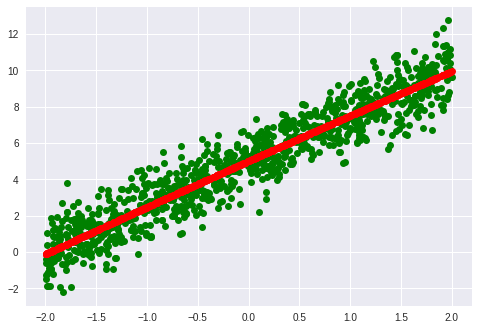

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize


# Data
lenT = 1000
x1=-2+4*np.random.rand(lenT)
y=np.zeros(lenT)
for j in range(lenT):
    y[j] = 5 + 2.5*x1[j] + np.random.normal(0,1)

plt.plot(x1,y,'go')

# Regression

# np.polyfit(x1, y, 1)

coefs=poly.polyfit(x1, y, 2)
print("linear regression")
print(coefs)
ffit=poly.polyval(x1, coefs)
plt.plot(x1, ffit, 'ro')
plt.show()





In [8]:
# Optimization (Simplex)

def gradient(params):
    a0 = params[0]
    b1 = params[1]
    return np.array([-2.0*sum((y - a0 - b1*x1))/lenT, -2.0*sum((y - a0 - b1*x1)*x1)/lenT])

def objFunc1(params):
    a0 = params[0]
    b1 = params[1]
    return sum((y - a0 - b1*x1)**2)/lenT


tol  = 1e-6
# y = a0 + b1 * x1;
a0 = 1000
b1 = 1000
params = [a0, b1]
params = scipy.optimize.fmin(objFunc1, params, xtol=tol, ftol=tol, maxiter=500, maxfun=50000)
print("Simplex:")
print(params)



Optimization terminated successfully.
         Current function value: 0.988142
         Iterations: 77
         Function evaluations: 148
Simplex:
[5.01320072 2.51511504]


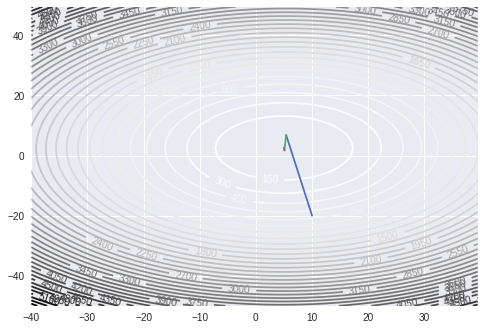

In [9]:
# Gradient Descent

a =np.arange(-40, 40, 0.5)
len1 = a.size
b =np.arange(-50, 50, 0.5)
len2 = b.size

s = np.zeros((len2,len1), np.float64)

for i in range(len1):
    for j in range(len2):
        s[j,i] = sum((y-a[i]-b[j]*x1)**2)/lenT

#subplot(1,2,1);

# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(a, b, s, 40)
fmt = '%1.0f'

ax.clabel(CS, inline=1, fmt=fmt,fontsize=10)

# Simple code on Gradient Descent
x_i = np.array([10, -20])
x_0 = x_i

g1 = 0.45
nIters=300
for i in range (nIters):
    #quiver(x_i(1), x_i(2), -g1 * delF(1), -g1 * delF(2));
    x_pre = x_i
    x_i = x_i - g1 * gradient(x_i)
    plt.plot([x_pre[0],x_i[0]], [x_pre[1],x_i[1]])

#    plt.plot(X_i[0], X_i[1], 'o', 'LineWidth', 2, 'MarkerEdgeColor', 'k', 'MarkerFaceColor', 'g', 'MarkerSize', 3)

x = x_i[0]
y = x_i[1]
fF = poly.polyval(x1, x_i)
#print("{},{}".format(fF, x_i))

plt.show()



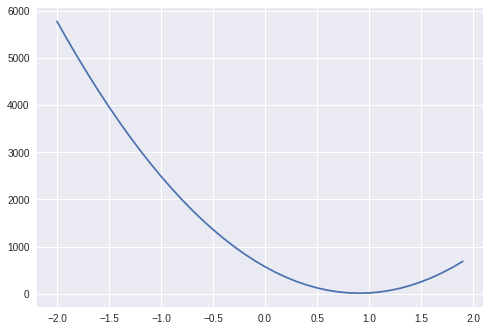

In [4]:


# Visulaization( for higher dimensional

x_S = x_i
alpha=np.arange(-2, 2, 0.1)
len3 = alpha.size
lossValues = np.zeros((len3, 1), np.float64)

for k in range (len3):
    x_Tmp = (1 - alpha[k]) * x_0 + alpha[k] * x_S
    lossValues[k] = objFunc1(x_Tmp)
plt.plot(alpha, lossValues)
plt.show()

